In [1]:
import pandas as pd

# 데이터 불러오기

In [2]:
df_og = pd.read_csv('분석용데이터_utf.csv')

[ 데이터 변수 설명 ]
- SPI = 전국 SPI => Target Attribute
- M2 = M2 평잔
- comp basemoneny rate = 회사채 3년(평균) 금리
- base rate = 기준 금리
- consumer price index = 소비자 물가 지수
- kospi close = 코스피 종가
- ex-rate close = 환율 종가

In [12]:
df = df_og.copy()
df

,Date,M2,comp basemoney rate,base rate,consumer price index,kospi close,ex-rate close,spi
0,201101월,1676.4,4.52,2.75,3.4,2069.73,1119.25,81.2
1,201102월,1674.4,4.72,2.75,3.9,1939.30,1124.65,82.5
2,201103월,1677.5,4.54,3.00,4.1,2106.70,1095.50,83.4
3,201104월,1684.8,4.54,3.00,3.8,2192.36,1068.00,83.9
4,201105월,1690.5,4.44,3.00,3.9,2142.47,1078.00,84.1
...,...,...,...,...,...,...,...,...
115,202008월,3100.4,2.19,0.50,0.7,2326.17,1187.94,113.2
116,202009월,3115.2,2.24,0.50,1.0,2327.89,1164.65,114.2
117,202010월,3152.8,2.24,0.50,0.1,2267.15,1136.49,115.8
118,202011월,3183.5,2.25,0.50,0.6,2591.34,1109.32,118.6


In [13]:
df.set_index('Date', inplace = True)

In [14]:
df

,M2,comp basemoney rate,base rate,consumer price index,kospi close,ex-rate close,spi
Date,,,,,,,
201101월,1676.4,4.52,2.75,3.4,2069.73,1119.25,81.2
201102월,1674.4,4.72,2.75,3.9,1939.30,1124.65,82.5
201103월,1677.5,4.54,3.00,4.1,2106.70,1095.50,83.4
201104월,1684.8,4.54,3.00,3.8,2192.36,1068.00,83.9
201105월,1690.5,4.44,3.00,3.9,2142.47,1078.00,84.1
...,...,...,...,...,...,...,...
202008월,3100.4,2.19,0.50,0.7,2326.17,1187.94,113.2
202009월,3115.2,2.24,0.50,1.0,2327.89,1164.65,114.2
202010월,3152.8,2.24,0.50,0.1,2267.15,1136.49,115.8


# EDA

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df.columns

In [ ]:
df.index

In [ ]:
# SPI 변화 추이
sns.lineplot(x = df.index, y = df.spi)

In [ ]:
# M2 변화 추이
sns.lineplot(x = df.index, y = df.M2)

In [ ]:
# 회사채 3년(평균) 금리 변화 추이
sns.lineplot(x = df.index, y = df['comp basemoney rate'])

In [ ]:
# 기준 금리 변화 추이
sns.lineplot(x = df.index, y = df['base rate'])

In [ ]:
# 소비자 물가 지수 변화 추이
sns.lineplot(x = df.index, y = df['consumer price index'])

In [ ]:
# 코스피 종가 변화 추이
sns.lineplot(x = df.index, y = df['kospi close'])

In [ ]:
# 환율 종가 변화 추이
sns.lineplot(x = df.index, y = df['ex-rate close'])

# Data Preprocessing

- SVM 모델 ==> Normalization or Standardization 필요 O
- LSTM 모델 ==>Normalization or Standardization 필요한지 확인해보기 

In [15]:
df['next_spi'] = df['spi'].shift(-1)
df['next_spi'][-1] = 125.3

In [16]:
df

,M2,comp basemoney rate,base rate,consumer price index,kospi close,ex-rate close,spi,next_spi
Date,,,,,,,,
201101월,1676.4,4.52,2.75,3.4,2069.73,1119.25,81.2,82.5
201102월,1674.4,4.72,2.75,3.9,1939.30,1124.65,82.5,83.4
201103월,1677.5,4.54,3.00,4.1,2106.70,1095.50,83.4,83.9
201104월,1684.8,4.54,3.00,3.8,2192.36,1068.00,83.9,84.1
201105월,1690.5,4.44,3.00,3.9,2142.47,1078.00,84.1,84.3
...,...,...,...,...,...,...,...,...
202008월,3100.4,2.19,0.50,0.7,2326.17,1187.94,113.2,114.2
202009월,3115.2,2.24,0.50,1.0,2327.89,1164.65,114.2,115.8
202010월,3152.8,2.24,0.50,0.1,2267.15,1136.49,115.8,118.6


In [17]:
#전달의 spi와 차가 음수 -> 0
#전달의 spi와 차가 0 이상 -> 1
df['subtract_spi'] = df['next_spi'] - df['next_spi'].shift()   # df['next_spi'].shift()는 df의 next_spi값을 한 칸씩 아래로 내린 거
df['subtract_spi'][0] = 0.3 #그 전달이 0.5 라서 차이 뺸 것
df['spi_target'] = df['subtract_spi'].apply(lambda x : 0 if x < 0 else 1)

In [18]:
df.drop(['spi', 'subtract_spi', 'next_spi'], axis = 1, inplace = True)

In [19]:
df

,M2,comp basemoney rate,base rate,consumer price index,kospi close,ex-rate close,spi_target
Date,,,,,,,
201101월,1676.4,4.52,2.75,3.4,2069.73,1119.25,1
201102월,1674.4,4.72,2.75,3.9,1939.30,1124.65,1
201103월,1677.5,4.54,3.00,4.1,2106.70,1095.50,1
201104월,1684.8,4.54,3.00,3.8,2192.36,1068.00,1
201105월,1690.5,4.44,3.00,3.9,2142.47,1078.00,1
...,...,...,...,...,...,...,...
202008월,3100.4,2.19,0.50,0.7,2326.17,1187.94,1
202009월,3115.2,2.24,0.50,1.0,2327.89,1164.65,1
202010월,3152.8,2.24,0.50,0.1,2267.15,1136.49,1


In [20]:
X = df.iloc[:,:-1]
y = df.spi_target

In [15]:
X.head()

,M2,comp basemoney rate,base rate,consumer price index,kospi close,ex-rate close
Date,,,,,,
201101월,1676.4,4.52,2.75,3.4,2069.73,1119.25
201102월,1674.4,4.72,2.75,3.9,1939.30,1124.65
201103월,1677.5,4.54,3.00,4.1,2106.70,1095.50
201104월,1684.8,4.54,3.00,3.8,2192.36,1068.00
201105월,1690.5,4.44,3.00,3.9,2142.47,1078.00


In [16]:
y

Date
201101월    1
201102월    1
201103월    1
201104월    1
201105월    1
          ..
202008월    1
202009월    1
202010월    1
202011월    1
202012월    0
Name: spi_target, Length: 120, dtype: int64

# SVM Classifier

In [21]:
def split_train_test(X,y,num_of_train):
    X_train = X.iloc[:num_of_train]
    X_test = pd.DataFrame(X.iloc[num_of_train]).T
    y_train = y.iloc[:num_of_train]
    
    return X_train, X_test, y_train

def model_evaluation(label, predict):
    cf_matrix = confusion_matrix(label, predict)
    Accuracy = (cf_matrix[0][0] + cf_matrix[1][1]) / sum(sum(cf_matrix))
    Precision = cf_matrix[1][1] / (cf_matrix[1][1] + cf_matrix[0][1])
    Recall = cf_matrix[1][1] / (cf_matrix[1][1] + cf_matrix[1][0])
    Specificity = cf_matrix[0][0] / (cf_matrix[0][0] + cf_matrix[0][1])
    F1_Score = (2 * Recall * Precision) / (Recall + Precision)
    print("Accuracy: ", Accuracy) 
    print("Precision: ", Precision)
    print("Recall: ", Recall)
    print("Specificity: ", Specificity)
    print("F1_Score: ", F1_Score)


In [22]:
from sklearn.svm import SVC         # SVM Classifier 사용
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

* SVC 파라미터 *
- kernel : {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’


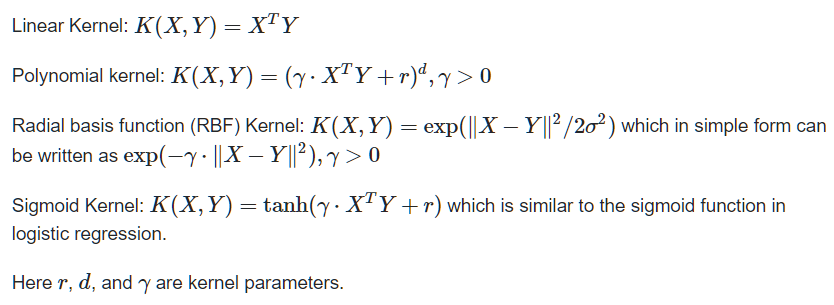

In [23]:
def train_predict(X, y, num_of_train):
    y_pred = []
    y_test = y[num_of_train:].tolist()
    
    for i in range(num_of_train, X.shape[0]):
        X_train, X_test, y_train = split_train_test(X, y, i)
        
        # StandardScaler 이용 스케일링 => 각 변수의 평균을 0, 표준편차가 1이 되도록 스케일링
        sc = StandardScaler()
        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)
        
        svm_clf = SVC(kernel = 'rbf') # poly (다항식) 커널, linear (선형) 커널 , etc,,, /    default = 'rbf' (가우시안 커널)
        svm_clf.fit(X_train, y_train)
        pred = svm_clf.predict(X_test)
        y_pred.append(pred[0])
        del X_train, X_test, y_train

    print(confusion_matrix(y_test,y_pred))
    print(model_evaluation(y_test,y_pred))
    print("auc: ", roc_auc_score(y_test,y_pred))

In [24]:
train_predict(X,y,90)

[[ 2  5]
 [ 2 21]]
Accuracy:  0.7666666666666667
Precision:  0.8076923076923077
Recall:  0.9130434782608695
Specificity:  0.2857142857142857
F1_Score:  0.8571428571428572
None
auc:  0.5993788819875776


In [24]:
y[90:].value_counts()

1    22
0     8
Name: spi_target, dtype: int64